In [5]:
import sys
sys.path.insert(0, '..')

import portfolio_construction_precise as pc
import numpy as np
import pandas as pd
import torch

predictions_by_alpha = {}

INPUT_SIZE = 5       
OUTPUT_SIZE = 3      
N_SAMPLES = 200      
N_TEST_SAMPLES = 1
N_EPOCH = int(1E4)
ALPHA = .1

np.random.seed(1)
torch.manual_seed(1)

X_train = np.random.normal(0, 1, (N_SAMPLES, INPUT_SIZE))

true_weights = np.random.randn(INPUT_SIZE, OUTPUT_SIZE)
true_biases = np.random.randn(OUTPUT_SIZE)

Y_train = X_train.dot(true_weights) + true_biases + np.random.normal(0, 0.5, (N_SAMPLES, OUTPUT_SIZE))

# Convert data tensors to double precision
X_train_tensor = torch.from_numpy(X_train).double()
Y_train_tensor = torch.from_numpy(Y_train).double()

X_new = np.random.randn(1, INPUT_SIZE)
Y_new = X_new.dot(true_weights) + true_biases + np.random.normal(0, 0.5, (1, OUTPUT_SIZE))

for alpha in range(0, 101, 5):
    # Ensure the model is in double precision
    model = pc.SimpleLinearModel(INPUT_SIZE, OUTPUT_SIZE).double()
    optimizer = pc.PortfolioOptimizer(model, X_train_tensor, Y_train_tensor)

    optimizer.train(alpha=alpha / 10000, n_epoch=N_EPOCH)
    weights = optimizer.get_training_parameters()
    biases = optimizer.get_training_bias()
    predictions_by_alpha[alpha] = optimizer.eval(X_new)

<Axes: >

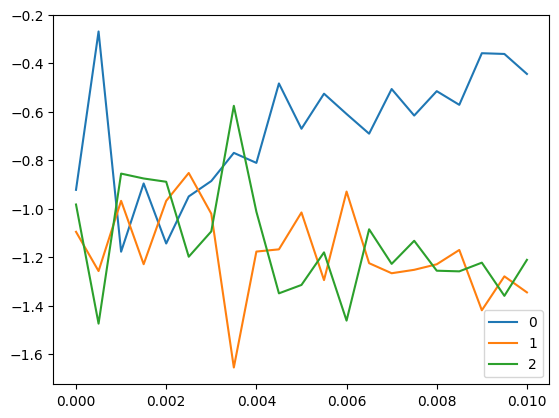

In [6]:
(
    pd.DataFrame({alpha / 10000: list(values[0]) for alpha, values in predictions_by_alpha.items()})
    .transpose()
    .plot()
)